# Basics of NLP: DataFrame rudiments and spaCy

## Libraries 

We will consider a corpus of radio recordings in french (source: France inter, RFI, ...) :  RADIOS.txt


The first step in writing python code is determining which libraries we want to use. To stay organized, we generally import all libraries at the top (of a notebook or a standalone python file).

In [18]:
#import four important libraries
import pandas as pd
#pandas is the most popular data science library. It is used
#for organizing data into columns.
#See more here: https://pandas.pydata.org/

import re
#re is the python library for regular expressions. It is
#difficult to master, but very useful.
#See more here: https://docs.python.org/3/library/re.html

import matplotlib.pyplot as plt
#matplotlib is the most popular and simple library for
#scientific plots in python. The pyplot submodule is
#a data scientist's bread and butter for data visualization.
#See more here: https://matplotlib.org/2.0.2/api/pyplot_api.html

import xml.etree.ElementTree as ET
#ElementTree is a library for parsing XML in python.
#This is a useful skill for data scientists, as lots of data
#is published in XML form. There are other libraries for this,
#such as untangle or xmltodict; however, ElementTree is lower level.
#See more here: https://docs.python.org/3/library/xml.etree.elementtree.html

from numpy import log, concatenate
#we will need a logarithm function; numpy is a standard mathematical
#library

## Pandas Dataframe basics

In this TP we use Pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to manage our dataset. Pandas is a standard tool in data science.

In [19]:
#read the dataset as a DataFrame
df_radios = pd.read_csv('RADIOS.txt', names=['text'])

In [20]:
print(len(df_radios))
df_radios.head()

35356


,text
0,patricia martin que voici que voilà
1,oh bonjour nicolas stoufflet
2,france-inter sept heures
3,le journal simon tivolle
4,bonjour


We can list the columns of a dataset ````df```` by calling ````df.columns````.

**Question**: What are the columns of the dataset ````df_radios````?

In [21]:
df_radios.columns
#todo: explain each column

Index(['text'], dtype='object')

**Answer**: There is only one column, which is named 'text'. It contains text.

We can access to a specific using ````df.loc[i]```` or ````df.iloc[i]```` 


**Question**: What is the difference between .loc and .iloc?

**Answer**: loc is used to access by name and iloc by index.

In [22]:
#todo: save the text value of the 5th element of our dataset into the one_text variable. 
one_text = df_radios.iloc[4].text

one_text

'bonjour'

We can count the number of words in a string using the ````len```` function and ````split```` method of strings. For example:


```
string = "bla bla bla"
len(string.split(" "))
>>> 3
```

**Question**: Fill in the following function and run it for a our ````one_text```` example. 






In [23]:
def num_words(sentence):
    '''
    Calculate the number of words in the sentence.
    '''
    return len(sentence.split(" "))

num_words(one_text)

1


Furthermore, we can calculate values for each row, based on a specific column, using the ````apply```` method:

```
lengths = df.column_name.apply(lambda text: num_words(text))
```

This will give us a [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of the lengths of each text.

**Question**: Add the length of each text as a new column in the dataframe (see [pandas docs](https://pandas.pydata.org/docs/user_guide/dsintro.html#basics-dataframe-sel-add-del) for details). 

**Question**: What is the distribution of the length of the texts in words? Visualize this using a python plot (see [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).



(array([1.2295e+04, 9.6080e+03, 5.9810e+03, 3.1830e+03, 1.4720e+03,
        8.0400e+02, 4.9600e+02, 3.2700e+02, 2.0900e+02, 1.4300e+02,
        1.3100e+02, 1.0100e+02, 8.5000e+01, 8.4000e+01, 6.3000e+01,
        5.0000e+01, 4.7000e+01, 2.7000e+01, 3.1000e+01, 3.6000e+01,
        3.9000e+01, 1.4000e+01, 2.6000e+01, 1.2000e+01, 1.6000e+01,
        1.0000e+01, 1.3000e+01, 9.0000e+00, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

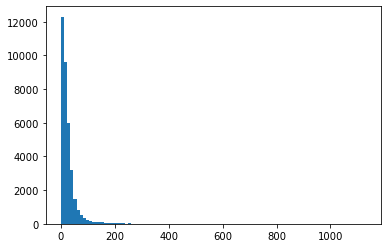

In [24]:
df_radios['lengths'] = df_radios.text.apply(num_words)

## to plot 
plt.hist(df_radios.lengths,bins=100) 

We can filter a dataframe using criteria based on values in certain columns. The basic syntax for this is:

````
new_df = df[df["column"].apply(lambda row_value: my_func(row_value) == some_value)]
````

This gives a new DataFrame composed of all elements of ````df```` such the values of the function ````myfunc````, calculated for the value of column "column" for each row is equal to some_value. For example, if we wanted all rows that begin with "a", we could run:

````
df_letter_A = df[df["text"].apply(lambda text: text[0] == "a")]
````

**Question**: Retain only documents with at least 50 words

In [25]:
df_long_documents = df_radios[df_radios.text.apply(lambda text: num_words(text) >= 50)]

df_long_documents.head()

,text,lengths
34,il quitte l' école à douze ans pour aider son ...,56
42,selon jack lang césar était était l' une des f...,62
45,la chaîne de l' espoir c'est une association c...,52
46,l' association a été créée par un professeur e...,55
100,nicole notat est arrivée en trois ans à réduir...,60


### Finding useful information in the text:

We will implement regular expresions (regex) to filter the text according to a specific condiction. 

To implement the regex evaluation in Pandas we use the [`Series.str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) filtering function, as :

```` df.column_name.str.contains('[a-z]', regex=True)````

Also useful: `match`, `Series.str.startswith`, `Series.str.endswith`


**Question**  : How many texts are there with at least one word of 9 letters in RADIOS.txt?

**Question**  : Are there any texts with words without vowels in RADIOS.txt?


You can use the following regexs : 

| regex | Description |
|--------|--------------------|
|`'[A-Z]'`|filtre lignes contenant une majuscule|
|`'^[A-Z]'`|filtre lignes commençant par une majuscule|
|`'[A-Z]$'`|filtre lignes finissant par une majuscule|
|`'^[A-Z]*$'`|filtre lignes entièrement majuscules|
|`'[aeiouAEIOU]'`|filtre lignes contenant une voyelle|
|`'^[aeiouAEIOU]'`|filtre lignes commençant par une voyelle|
|`'[aeiouAEIOU]$'`|filtre lignes finissant par une voyelle|
|`'^[^aeiouAEIOU]'`|filtre lignes commençant par une non-voyelle|
|`'[^aeiouAEIOU]$'`|filtre lignes finissant par une non-voyelle|
|`'[aeiouAEIOU].*[aeiouAEIOU]'`|filtre lignes avec au moins deux voyelles|
|`'^[^aeiouAEIOU]*[aeiouAEIOU][^aeiouAEIOU]*$'`| filtre lignes avec exactement une voyelle|

Avec expressions régulières:

| Expression | Match |
|--------|--------------------|
|`a`|la lettre "a"|
|`[a-z]`|une lettre minuscule|
|`[A-Z]`|une lettre majuscule|
|`[0-9]`|un chiffre|
|`[0123456789]`|un chiffre|
|`[aeiouAEIOU]`|une voyelle|
|`[^aeiouAEIOU]`|tout sauf une voyelle|
|`.`|un caractère|
|`^`|début de ligne|
|`$`|fin de ligne|
|`x*`| "x" répété 0 fois ou plus|
|``x+``| "x" répété 1 fois ou plus|
|`x\|y`| "x" ou "y"|

In [26]:
## For example: 
df_radios['a-z'] = df_radios.text.str.contains('[a-z]', regex=True)
df_radios[df_radios['a-z']].head()

,text,lengths,a-z
0,patricia martin que voici que voilà,6,True
1,oh bonjour nicolas stoufflet,4,True
2,france-inter sept heures,3,True
3,le journal simon tivolle,4,True
4,bonjour,1,True


In [27]:
len(df_radios[df_radios.text.str.contains('\w{9}', regex=True)])

26559

In [28]:
len(df_radios[~df_radios.text.str.contains('[aeiouyàéèêùôAEIOUY]', regex=True)])

55

## Vocabulary 

We will create a a dictionary as the vocabulary for our corpus of texts. 
Create a dictionary where each key is a word and the value will be its frequency. 

```` texts_vocab = {'key1':value, 'key2':value} ````

**Question** Create a Vocabulary of bigrams and trigrams 

**Question** How many different words exist in our corpus of texts?

**Question**: What is the frequency distribution of the words? use ```plt.hist```

**Question** [optional] How many bigrams and trigrams exist? Visualize the frequency distribution. 



In [29]:
text_vocab = pd.Series(' '.join(df_radios.text).split()).value_counts().to_dict()

## Introduction to spaCy

spaCy is a package that performs some basic NLP tasks for us, based on training on a large corpus. We can import spaCy libraries for different languages and of different complexities (often in small, medium, and large sizes, where larger means slower to use but with slightly more precise behaviour). For our use case, we will "fr_core_news_sm", which is the small French language  model.

For basic questions about spaCy, refer to the documentation [here](https://spacy.io/usage/spacy-101).

In [30]:
!python -m spacy download fr_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 916.3 kB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [31]:
import spacy
from spacy.lang.fr.examples import sentences 
# nlp = spacy.load("en_core_web_sm") 
nlp = spacy.load("fr_core_news_sm")  #this could take a minute to download the first time


The ````nlp```` object can be used to analyze documents. For example:

````doc_analyzed = nlp("Hello world")
doc_analyzed
>>> Hello world
type(doc_analyzed)
>>> spacy.tokens.doc.Doc
````

In [32]:
doc = nlp(one_text)
type(doc)

spacy.tokens.doc.Doc


**Question**: Use spaCy to list each token in the ````text```` of the document with id 1500.

*Hint: spacy.tokens.doc.Doc is an iterable*

In [33]:
doc1500 = nlp(df_radios.loc[1500].text)
for token in doc1500:
    print(token.text)

c'
est
pour
ça
que
nous
sommes
associés
à
elle


**Question**: List the POS of every token from the previous exercise. Do you agree with spaCy?

*Hint: use token.pos_*

In [34]:
for token in doc1500:
    print(token.text, token.pos_)

c' PRON
est AUX
pour ADP
ça PRON
que PRON
nous PRON
sommes AUX
associés VERB
à ADP
elle PRON


The lemma of a term is the simplest and most distilled version of the term, without prefixes, suffixes, etc. Converting terms to lemmas can be useful in order to reduce the vocabulary size of a corpus and group terms into equivalence classes. For example, "run", "runs", "running", and "ran" all share roughly the same semantic meaning, and in some contexts (though not all!) should be treated the same way.

**Question**: extract the lemmas from the previous exercise. Which terms stay the same, and which differ? In what ways do they differ?

*Hint: use token.lemma_*

In [35]:
for token in doc1500:
    print(token.lemma_)

ce
être
pour
cela
que
nous
être
associer
à
lui


**Answer**: They almost all differ. It either puts the word to masculin, develops it, or get its verbal base:  
    c' -> ce  
    elle -> lui  
    est -> être

**Question**: How many unique terms are there among all the texts? How many unique *lemmas* are there among all the texts?

In [36]:
len(text_vocab)

34035

In [37]:
lemmas = {}

def create_lemmas(sentence):
    for token in nlp(sentence):
        lemmas[token.lemma_] = True

df_radios.text.apply(create_lemmas)

len(lemmas)

24472

**Question**: Plot the distribution of POS over the all the texts.

In [38]:
pos = {}

def create_pos(sentence):
    for token in nlp(sentence):
        pos_ = token.pos_
        if pos_ in pos.keys():
            pos[pos_] += 1
        else:
            pos[pos_] = 1

df_radios.text.apply(create_pos)

0        None
1        None
2        None
3        None
4        None
         ... 
35351    None
35352    None
35353    None
35354    None
35355    None
Name: text, Length: 35356, dtype: object

<BarContainer object of 16 artists>

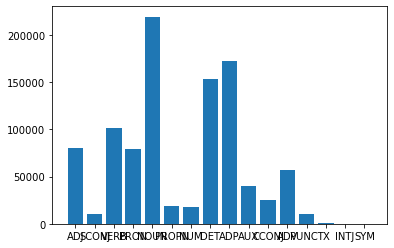

In [39]:
plt.bar(pos.keys(), pos.values())

**Question**: Plot the distribution of the 100 most common words over the all the texts, provided that they are not space or punctuation. Use a log scale for the y axes and describe the graph: the y axis should be frequency, and the x axis should be words sorted by frequency.

*Hint: see [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)*

<AxesSubplot:>

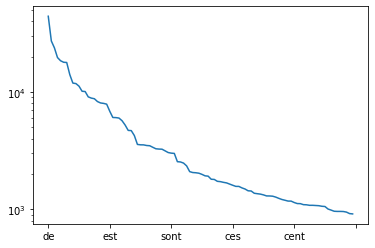

In [40]:
pd.Series(' '.join(df_radios.text).split()).value_counts().head(100).plot(logy=True)

## Stop words

Stop words are words that, under some frameworks, contribute marginal semantic value, but are important for syntax. For example, "the", "and", "such", etc.

**Question**: In what kind of analysis can we strike stop words without worrying about losing information? In what kind of analysis might we want to keep them around?


**Question**: Write a function:

````def clean(sentence)````

that strikes all stop words, replaces each remaining token with its lemma. Create a cleaned version of each abstract, and save this cleaned version as a new column of the dataframe called "text_clean".

**Answer**: We want to keep the stop words when performing a syntaxical analysis, and we can strike them when doing semantical analysis.

In [41]:
def clean(sentence):
    s = ""
    for token in nlp(sentence):
        if not token.is_stop:
            s += token.lemma_ + " "
    return s

df_radios["text_clean"] = df_radios.text.apply(clean)

df_radios.head()

,text,lengths,a-z,text_clean
0,patricia martin que voici que voilà,6,True,patricia martin
1,oh bonjour nicolas stoufflet,4,True,oh bonjour nicola stoufflet
2,france-inter sept heures,3,True,france - inter heure
3,le journal simon tivolle,4,True,journal simon tivolle
4,bonjour,1,True,bonjour


## Dependencies
spaCy calculates dependencies between different tokens:

In [42]:
exp_doc = nlp("Hello! I hope you are well.")
# exp_doc = nlp(one_text)
for word in exp_doc:
   print(word.text, word.tag_, word.head)

Hello PROPN Hello
! PUNCT Hello
I NOUN I
hope NOUN hope
you NOUN hope
are VERB hope
well PROPN hope
. PUNCT hope


We can visualize this using dispacy, a visualization library:

In [43]:
from spacy import displacy
displacy.render(exp_doc, style='dep', jupyter=True, options={'distance': 130})

**Question**: Visualize a random title from the dataframe - describe the visualization.

In [44]:
displacy.render(nlp(df_radios.iloc[1500].text), style='dep', jupyter=True, options={'distance': 130})

**Answer**: The graph describes the dependancy between each groups of words, and then the dependancies inside of each group:  
que nous sommes associés -> à elle (obl:mod)  
elle -> à (case)

## NER

spaCy can determine named entities.

In [45]:

for ent in nlp("Joe Biden is the president of the USA").ents:
    print("ENT: ", ent.text, ent.label_, spacy.explain(ent.label_))


ENT:  Joe Biden PER Named person or family.


**Question**: calculate the ten most common named entities and the five most common labels among the texts.

In [46]:
entities = {}
labels = {}

def create_dics(sentence):
    for ent in nlp(sentence).ents:
        if ent.text in entities.keys():
            entities[ent.text] += 1
        else:
            entities[ent.text] = 1
        if ent.label_ in labels.keys():
            labels[ent.label_] += 1
        else:
            labels[ent.label_] = 1

df_radios.text.apply(create_dics)


0        None
1        None
2        None
3        None
4        None
         ... 
35351    None
35352    None
35353    None
35354    None
35355    None
Name: text, Length: 35356, dtype: object

In [48]:

print(dict(sorted(entities.items(), key=lambda item: item[1], reverse=True)[:11]))
print(dict(sorted(labels.items(), key=lambda item: item[1], reverse=True)[:6]))


{'irak': 769, 'paris': 601, 'france': 566, 'la france': 510, 'états unis': 489, 'bagdad': 475, 'israël': 401, 'américains': 335, 'saddam hussein': 318, 'europe': 288, 'état': 277}
{'LOC': 15532, 'PER': 10650, 'ORG': 3344, 'MISC': 2409}


## TF-IDF

One of the most important statistics we can calculate for a document is the TF-IDF score. This stands for "term frequency-inverse document frequency" score, and it is a measure of the importance of each word to a given document, in the context of the corpus of documents. For each word in each document, we calculate the following ratio:

${TF_{word; doc}}\times{IDF_{word; doc}}$

$TF_{word; doc} = \frac{\text{Total counts of word in doc}}{\text{Number of terms in doc}}$

$IDF_{word; doc} = \log{\left(\frac{|\text{corpus}|}{\text{Number of docs containing word}}\right)}$

To have a high TF-IDF score in a document, a word must occur frequently in a document, while appearing rarely in others.

**Question**: Give the limits of TF and IDF for a word/document pair, and give an example of a word-document pair where this might occur (for example, word="Hello", doc=Wikipedia page for greetings, corpus=all of Wikipedia).


**Answer**:  
limit max TF = 1  
limit min TF = 0  
limit max IDF = log(|corpus|)  
limit min IDF = 0  
limit max TF-IDF = log(|corpus|)  
limit min TF-IDF = 0

**Question**: Code the functions TF and IDF:


In [49]:
def tf(word, document):
    l = document.split(" ")
    return l.count(word)/len(l)
        

def idf(word, all_documents):
    c = 0
    for doc in all_documents:
        if tf(word, doc) > 0:
            c += 1
    return log(len(all_documents)/c)



def tf_idf(word, document, all_documents):
    return tf(word, document)*idf(word, all_documents)

#test your code:
my_text = df_radios.iloc[0].text_clean
tf_idf("radio", my_text, df_radios.text_clean)

0.0

**Question**: What is the word with the highest and lowest TF-IDF score?

In [ ]:
max = 0
min = len(df_radios.text)
wmax, wmin = "", ""
docmax, docmin = 0, 0
for w in text_vocab.keys():
    for doc in df_radios.text:
        val = tf_idf(w, doc, df_radios.text)
        if val < min:
            wmin = w
            docmin = doc
        elif val > max:
            wmax = w
            docmax = doc

print(wmax, docmax)
print(wmin, docmin)

KeyboardInterrupt: 

**Question**: If we took each document and duplicated it in place, i.e.:

a document "hello world" would become "hello world hello world", how would the tf-idf score of any document-word pair change?

What about if instead of duplicating in place, we doubled the size of the corpus, i.e.

if document "hello world" is in the corpus once, we add a second copy so now it is in the corpus twice. How would the tf-idf score of any document-word pair change now?

**Answer**:  
If we duplicate each document in place,the TF_IDF score will remain the same.  
If we double the size of the corpus, the TF_IDF score will also remain the same.

**Question**: What could be a potential use-case for the TF-IDF score in practice?

**Answer**: The TF-IDF score converts words to numbers that are easier to use in differents algorithms. We can use it to find relevant words in a corpus.

### Final Comments 

Add your conclusions about this lab. You can include your level of satisfation with your work and your opinion on the length and difficulty of the exercises.

**Answer**: The difficulty is fine thanks to the fact that we've already worked a bit with pandas. The length is good too: just a little at home work to finish. I think it would be great to see the utility of the TF-IDF score in an exemple. However, finding the words with the highest and lowest tf-idf score takes too much time...